[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olegr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olegr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olegr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset size: (14640, 15)


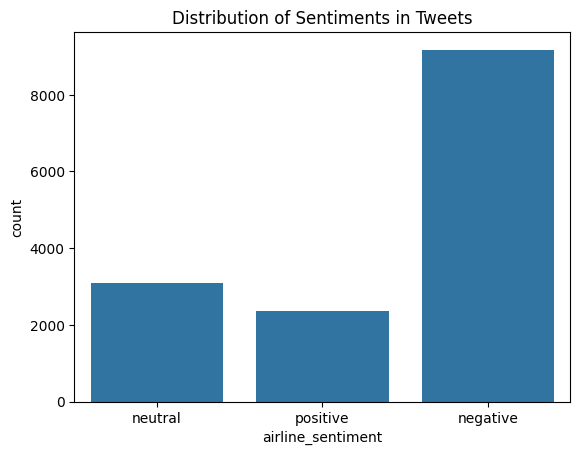


Example of Cleaned Text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  

 Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.68      0.49      0.57       580
    positive       0.82      0.61      0.70       459

    accuracy                           0.80      2928
   macro a

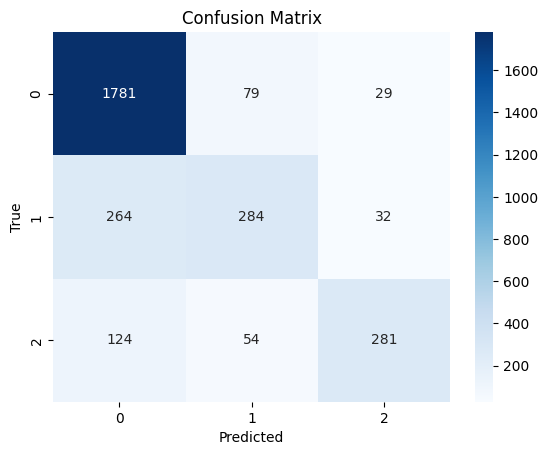

In [13]:
# --------------------------------------------
#  1. Import Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#  NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# --------------------------------------------
#  2. Loading the Dataset
# --------------------------------------------
df = pd.read_csv("Tweets.csv") 
print("Dataset size:", df.shape)
df = df[["airline_sentiment", "text"]]  # Keep only the necessary columns
df = df[df["airline_sentiment"].isin(["positive", "neutral", "negative"])]  # Remove unwanted rows
df = df.dropna()

# --------------------------------------------
# 3. Visualization 
# --------------------------------------------
sns.countplot(x="airline_sentiment", data=df)
plt.title("Distribution of Sentiments in Tweets")
plt.show()

# --------------------------------------------
#  4. Text Cleaning
# --------------------------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = text.split()  # Replace word_tokenize with split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalpha()]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
print("\nExample of Cleaned Text:")
print(df[["text", "clean_text"]].head())

# --------------------------------------------
#  5. TF-IDF
# --------------------------------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_text"])
y = df["airline_sentiment"]

# --------------------------------------------
#  6. Splitting Data into Training and Test Sets
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------
# 7. Model Training
# --------------------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --------------------------------------------
#  8. Model Evaluation
# --------------------------------------------
y_pred = model.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



In [10]:
import gradio as gr

# Prediction
def predict_sentiment(text):
    
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalpha()]
    clean = " ".join(tokens)

    # Vectoring
    X = tfidf.transform([clean])
    pred = model.predict(X)[0]
    return f"Predicted sentiment: {pred.capitalize()}"

# interface Gradio
gr.Interface(fn=predict_sentiment,
             inputs="text",
             outputs="text",
             title="Airline Tweet Sentiment Classifier",
             description="Enter a tweet and the model will tell you if it's positive, negative or neutral..").launch()


C:\Users\olegr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
